# Build a model of runner's performance in Greensand Relay Race using R

In [1]:
# load dataframe
load("greensand.RData")

#Check what dataframes have loaded
ls()

[1] "greensand"

In [2]:
# check structure of dataframe loaded
str(greensand)

'data.frame':	4186 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...


The file **greensand.RData** was obtained from a University website.

The following gives a data dictionary for the dataframe `greensand`.

The columns in `greensand` are as follows:

* `legTime` - the time taken by the runner (in minutes), given in a decimal format: i.e. 30.75 corresponds to 30 minutes and 45 seconds. This will be the response variable.
* `year` - the year in which the race was run.
* `id` - a unique number indicating the runner (which remains the same if a runner takes part in two or more years)
* `gender` - the declared gender for the runner, taking the value M for male and F for female
* `ageClass` - the declared age class for the runner 
* `age` - the estimated age (in years) of the runner on the day of the race, which is based on the declared age class for the runner in each year they have taken part (a reasonable estimate is not possible for all runners)
* `leg` - the leg number that the runner had in the race, taking the values 1, 2, 3, 4, 5 or 6
* `legLen` - the length (in miles) of the leg 
* `mpm` - the speed of the runner (in minutes per mile)

## Pose questions and design study

The question that has been posed, is to find a model that represents the performance of runners in previous years. Then to use these predictions to generate new handicap times for each leg of the Greensand Relay race, to help make them fairer for more diverse runners. 

So intuitively we are looking to use this data to predict how much time it will take on average for a runner to complete a leg of the race, depending on the applicable explanatory variables (such as age, gender etc.)

The most obvious response variables are therefore `legTime` and `mpm`, as the former can be used to predict how long it will take to complete a leg. The latter can be used predict the average speed of a type of runner, of which we can then use to calculate a fair leg time by multiplying it by the leg mileage.

As the variables `legTime` and `mpm` are the dependent variables in this case, then either should not be fit as an explanatory variable.

In [4]:
# Make the vectors (variables) in the data frame directly accessible to R
attach(greensand)

# Check the dataframe has loaded OK
head(greensand)
tail(greensand)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
1988,1001,M,40,44.5,1,5.75,43.48,7.56
1988,1002,M,20,18.5,2,3.67,31.27,8.52
1988,1003,M,50,51.0,3,7.74,59.52,7.69
1988,1004,M,50,54.5,4,4.10,42.77,10.43
1988,1005,M,21,33.0,5,7.58,65.95,8.70
1988,1006,F,21,34.0,6,3.18,29.88,9.40


,year,id,gender,ageClass,age,leg,legLen,legTime,mpm
4181,2019,32271,F,45,49.5,1,5.54,60.78,10.97
4182,2019,30205,F,45,50.5,2,4.05,43.73,10.80
4183,2019,30203,M,50,51.0,3,9.10,84.28,9.26
4184,2019,31209,F,45,50.0,4,5.84,54.70,9.37
4185,2019,32275,F,35,39.5,5,5.28,66.97,12.68
4186,2019,32276,F,55,59.5,6,4.68,60.33,12.89


In [9]:
# code to check if missing values for any other variables
cat("Missing values by variable")
colSums(is.na(greensand))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0      101        0        0        0 
     mpm 
       0

In [5]:
#create dataframe without missing values
greensandNoNA  <- na.omit(greensand)

In [6]:
str(greensandNoNA)

'data.frame':	4085 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...
 - attr(*, "na.action")= 'omit' Named int  21 55 114 155 162 215 231 294 300 364 ...
  ..- attr(*, "names")= chr  "21" "55" "114" "155" ...


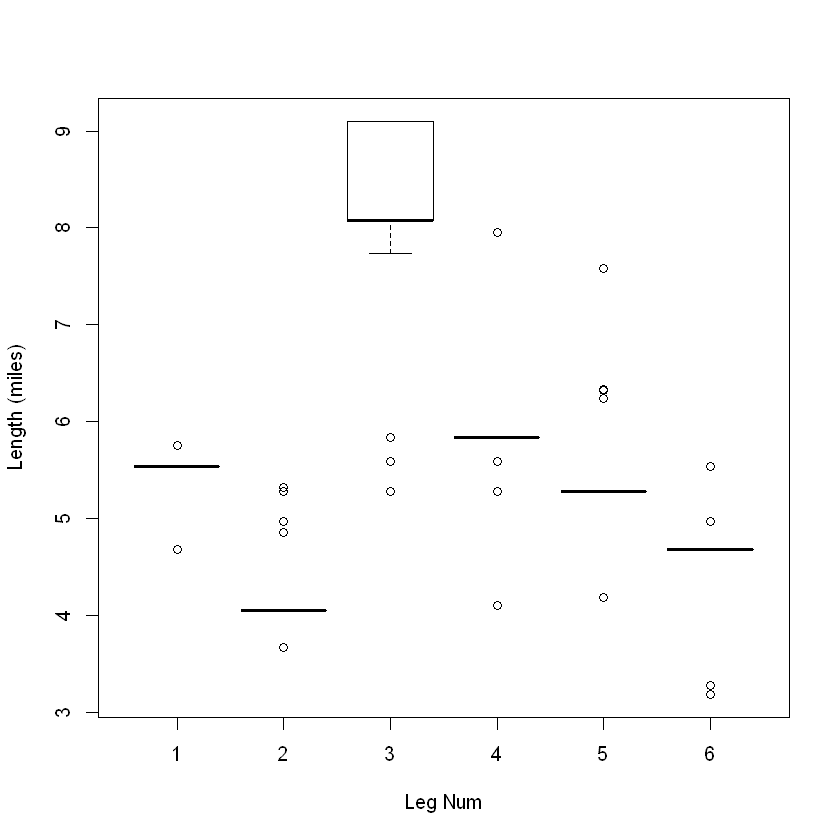

In [14]:
#create comparitive boxplot of leg length
plot(legLen ~ leg, xlab="Leg Num", ylab="Length (miles)")

We can see that `leg` and `legLen` are not independent variables. As `leg` changes so does `legLen` and thus to avoid multicollinearity we should use one variable or another but not both.

##### Removing unique `id` justification

The first variable I will choose to omit is the unique runner ID, my justification for this is, if I include it then I am modelling the leg times of specific unique runners, rather than what the generic properties of the runners (age, gender etc.) when predicting the leg times. 

Looking at the context I'm assuming this is what the organisers of the race is requesting when predicting "fairer" leg times. As opposed to "how quickly did runner no. "x" run the leg". 

So I will leave this variable out of my modelling from now on.


In [8]:
# detach greensand data frame from R to remove possibility for errors
detach(greensand)

## Building a generalised linear model

In [91]:
attach(greensand)

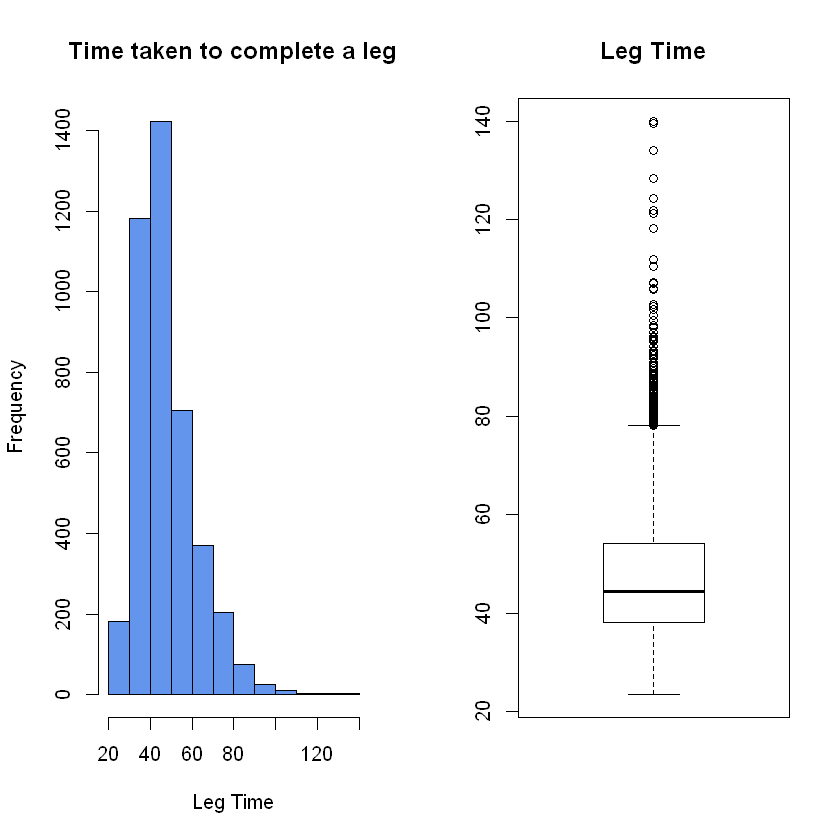

In [92]:
#create hist & boxplot of leg time
par(mfrow=c(1,2))

hist(legTime,
     main="Time taken to complete a leg",
     xlab="Leg Time",
     col="cornflowerblue",
     breaks = 10)

boxplot(legTime, main = "Leg Time")

## Choosing which GLM to use

From the box plot and histogram we can see the response `legTime` is right skewed. 

The data values are also positive, continuous (not a count) and partially bounded (values can go from zero to $\infty$), leading me to think this follows an exponential distribution. The fact it is a time for a runner to complete a leg as well makes me think this, as the exponential distribution has the memoryless property, as in it starts from zero for each participant.

The canonical link for this function is the negative reciprocal link, however this is not practical because this function only allows us to take negative values, therefore the log link is commonly used instead of the canonical link. So the log link function would be most appropriate.

##### Available case analysis

I will create my dataframe from the data which has no age values missing so I don't have to add additional code later on in my analysis. As explained earlier this is not complete case analysis because its inferred we are interested in having this independent variable in the final model.

In [93]:
detach (greensand)
# attach dataframe with no NA
attach(greensandNoNA)
# Check it has loaded OK
head(greensandNoNA)
str(greensandNoNA)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm,logLT,logLL
1988,1001,M,40,44.5,1,5.75,43.48,7.56,3.772301,1.749200
1988,1002,M,20,18.5,2,3.67,31.27,8.52,3.442659,1.300192
1988,1003,M,50,51.0,3,7.74,59.52,7.69,4.086312,2.046402
1988,1004,M,50,54.5,4,4.10,42.77,10.43,3.755837,1.410987
1988,1005,M,21,33.0,5,7.58,65.95,8.70,4.188897,2.025513
1988,1006,F,21,34.0,6,3.18,29.88,9.40,3.397189,1.156881


'data.frame':	4085 obs. of  11 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...
 $ logLT   : num  3.77 3.44 4.09 3.76 4.19 ...
 $ logLL   : num  1.75 1.3 2.05 1.41 2.03 ...
 - attr(*, "na.action")= 'omit' Named int  21 55 114 155 162 215 231 294 300 364 ...
  ..- attr(*, "names")= chr  "21" "55" "114" "155" ...


##### Transformation consideration

I will not transform my response this time as GLM's are for non-normal responses, so this is not necessary.

I may however fit a model keeping my transformation of the leg lengths, as transformations for explanatory variables is to enhance linearity, and GLM's are still linear models. 

However I would also fit a model without the transformation to see which one fits better.

##### Considering which variables and interactions

Again I'm omitting `id` as justified earlier

In [94]:
#create new dataframe
dataframe4  <- data.frame(year,gender,age,leg,legLen,logLL,legTime)
#check dataframe
head(dataframe4)

year,gender,age,leg,legLen,logLL,legTime
1988,M,44.5,1,5.75,1.749200,43.48
1988,M,18.5,2,3.67,1.300192,31.27
1988,M,51.0,3,7.74,2.046402,59.52
1988,M,54.5,4,4.10,1.410987,42.77
1988,M,33.0,5,7.58,2.025513,65.95
1988,F,34.0,6,3.18,1.156881,29.88


In [95]:
#detach original dataframe
detach(greensandNoNA)

#attach new dataframe
attach(dataframe4)

#check it has loaded ok & check calcs for logLL
head(dataframe4)

year,gender,age,leg,legLen,logLL,legTime
1988,M,44.5,1,5.75,1.749200,43.48
1988,M,18.5,2,3.67,1.300192,31.27
1988,M,51.0,3,7.74,2.046402,59.52
1988,M,54.5,4,4.10,1.410987,42.77
1988,M,33.0,5,7.58,2.025513,65.95
1988,F,34.0,6,3.18,1.156881,29.88


##### Choosing between `leg` and `legLen`

In [98]:
# Fit first glm model with leg and it's interactions
M10 <- glm(legTime ~ (year + gender + age) * leg, family = "Gamma"(link = "log"))

# Fit glm with leg and it's interactions
M11 <- glm(legTime ~ (year + gender + age) * legLen, family = "Gamma"(link = "log"))

# Fit glm with leg transformed and it's interactions
M12 <- glm(legTime ~ (year + gender + age) * logLL, family = "Gamma"(link = "log"))

# Obtain AIC's
extractAIC(M10)
extractAIC(M11)
extractAIC(M12)

[1]   198.00 27585.85

[1]    66.00 27827.62

[1]    66.00 27615.81

Because the models are not nested I am comparing the models by their AIC values. The model which has the lowest AIC is the model with `leg` and it's interactions so I am choosing to keep that variable.

Now I will test if the other variables should remain in the model using anova tests

In [100]:
# Fit glm without factor year
M13 <- glm(legTime ~ gender + age + leg, family = "Gamma"(link = "log"))

# Fit glm without factor gender
M14 <- glm(legTime ~ year + age + leg, family = "Gamma"(link = "log"))

# Fit glm without covariate age
M15 <- glm(legTime ~ year + gender + leg, family = "Gamma"(link = "log"))

# Fit glm without factor leg
M16 <- glm(legTime ~ year + gender + age, family = "Gamma"(link = "log"))

# Fit glm with all variables to compare to
M17 <- glm(legTime ~ year + gender + age + leg, family = "Gamma"(link = "log"))

# compare models to model with all variables
anova(M13, M17, test="Chisq")
anova(M14, M17, test="Chisq")
anova(M15, M17, test="Chisq")
anova(M16, M17, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4077,142.2005,NA,NA,NA
4047,136.3461,30,5.854363,1.448925e-19


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4048,154.0334,NA,NA,NA
4047,136.3461,1,17.68733,1.067725e-106


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4048,148.8528,NA,NA,NA
4047,136.3461,1,12.50666,5.258242e-76


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4052,289.8696,NA,NA,NA
4047,136.3461,5,153.5235,0


The p-value for the deviance differences for the factors `year`, `gender` and the covariate `age` are very small, which implies that the deviance difference is large enough to suggest that there is a significant gain in fit using these variables.

However the p-value for `leg` suggests that the factor does not need to be in the model. 

However the interactions for this variable may contribute something to the model. And due to the hierarchy principle if we are to include any interactions with this variable we will need to keep it in. So I will test again with the interactions for `leg` included to see if there is a gain in fit with them.

In [101]:
# Fit model with interactions for leg
M18 <- glm(legTime ~ (year + gender + age) * leg, family = "Gamma"(link = "log"))

# Fit model without interactions for leg
M19 <- glm(legTime ~ year + gender + age + leg, family = "Gamma"(link = "log"))

# compare models
anova(M19, M18, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4047,136.3461,NA,NA,NA
3887,88.2722,160,48.07389,5.171639e-289


The p-value is very small which tells us that the deviance difference is large enough to suggest that there is a significant gain in fit using the interactions for this variable. So I will keep it in for now.

The glm approach is to fit the saturated model and the null model and perform stepwise regression so all of the interactions will now be considered.

**Note:** I will use the model `legTime`~ `age` as my null model.

In [102]:
# Fit Exponential/Gamma distribution with saturated model and untransformed var
fullModel <- glm(legTime ~ year * gender * age * leg, family = "Gamma"(link = "log"))
                  
#Fit null model
nullModel <- glm(legTime ~ age, family = "Gamma"(link = "log"))                  

In [103]:
# run in both directions starting with full model no interactions
stepwiseFull3  <- step(fullModel, direction = "both", scope = list(lower = nullModel, upper = fullModel))
# Tell R dispersion is 1 to get exponential distn
summary(stepwiseFull3, dispersion = 1)

# run in both directions starting with null model
stepwiseNull3  <- step(nullModel, direction = "both", scope = list(lower = nullModel, upper = fullModel))
# Tell R dispersion is 1 to get exponential distn
summary(stepwiseNull3, dispersion = 1)

Start:  AIC=27991.94
legTime ~ year * gender * age * leg

                       Df Deviance   AIC
- year:gender:age:leg 125   78.059 27835
<none>                      75.771 27992

Step:  AIC=27863.86
legTime ~ year + gender + age + leg + year:gender + year:age + 
    gender:age + year:leg + gender:leg + age:leg + year:gender:age + 
    year:gender:leg + year:age:leg + gender:age:leg

                       Df Deviance   AIC
- year:gender:leg     145   81.070 27697
- year:age:leg        150   81.550 27706
- year:gender:age      30   78.739 27832
<none>                      78.059 27864
- gender:age:leg        5   78.312 27864
+ year:gender:age:leg 125   75.771 28021

Step:  AIC=27728.97
legTime ~ year + gender + age + leg + year:gender + year:age + 
    gender:age + year:leg + gender:leg + age:leg + year:gender:age + 
    year:age:leg + gender:age:leg

                   Df Deviance   AIC
- year:age:leg    150   84.571 27571
- year:gender:age  30   81.760 27697
- gender:age:leg    5  


Call:
glm(formula = legTime ~ year + gender + age + leg + year:age + 
    gender:age + year:leg, family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37043  -0.10295  -0.02911   0.06529   1.02877  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.7958187  0.7323991   5.183 2.19e-07 ***
year1989      -0.0968528  1.1264354  -0.086   0.9315    
year1990      -0.0282623  0.9408617  -0.030   0.9760    
year1991      -0.1288950  0.9943331  -0.130   0.8969    
year1992       0.2435950  0.9857334   0.247   0.8048    
year1993      -0.0846287  0.8770437  -0.096   0.9231    
year1994      -0.1275000  0.8707392  -0.146   0.8836    
year1995      -0.0725569  0.8477304  -0.086   0.9318    
year1996      -0.1165521  0.9056582  -0.129   0.8976    
year1997      -0.0817365  0.8811283  -0.093   0.9261    
year1998      -0.1613243  0.9265752  -0.174   0.8618    
year1999      -0.0098743  0.9533548  -0.010   0.9

Start:  AIC=32303.3
legTime ~ age

         Df Deviance   AIC
+ leg     5   161.54 30607
+ gender  1   297.32 32207
+ year   30   296.56 32256
<none>        305.62 32303

Step:  AIC=29684.78
legTime ~ age + leg

          Df Deviance   AIC
+ gender   1   142.20 29239
+ year    30   154.03 29571
+ age:leg  5   160.76 29677
<none>         161.54 29685
- leg      5   305.62 33012

Step:  AIC=29162.62
legTime ~ age + leg + gender

             Df Deviance   AIC
+ year       30   136.35 29070
+ age:leg     5   141.37 29151
+ gender:age  1   142.05 29161
+ gender:leg  5   141.81 29162
<none>            142.20 29163
- gender      1   161.54 29665
- leg         5   297.32 33197

Step:  AIC=29049.9
legTime ~ age + leg + gender + year

               Df Deviance   AIC
+ year:leg    150   88.657 28052
+ age:leg       5  135.494 29037
+ year:age     30  133.693 29038
+ gender:age    1  136.096 29045
+ gender:leg    5  135.969 29050
<none>             136.346 29050
+ year:gender  30  135.204 29079



Call:
glm(formula = legTime ~ age + leg + gender + year + leg:year + 
    age:year + age:gender, family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37043  -0.10295  -0.02911   0.06529   1.02877  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.7958187  0.7323991   5.183 2.19e-07 ***
age            0.0031211  0.0180187   0.173   0.8625    
leg2          -0.2089893  0.5782224  -0.361   0.7178    
leg3           0.2638560  0.6056117   0.436   0.6631    
leg4          -0.2264182  0.6027299  -0.376   0.7072    
leg5           0.4106378  0.5773813   0.711   0.4770    
leg6          -0.4624342  0.5781290  -0.800   0.4238    
genderM       -0.2324535  0.1366412  -1.701   0.0889 .  
year1989      -0.0968528  1.1264354  -0.086   0.9315    
year1990      -0.0282623  0.9408617  -0.030   0.9760    
year1991      -0.1288950  0.9943331  -0.130   0.8969    
year1992       0.2435950  0.9857334   0.247   0.8

In [104]:
# Obtain AIC's for fitted models
extractAIC(nullModel)
extractAIC(fullModel)
#Obtain AIC's for models through stepwise
extractAIC(stepwiseFull3)
extractAIC(stepwiseNull3)

[1]     2.0 32303.3

[1]   714.00 27991.94

[1]   219.0 27542.3

[1]   219.0 27542.3

##### Choosing the final model

The two models suggested are the same which is reassuring which is 

`legTime` ~  `age` + `leg` + `gender` + `year` + `leg:year` + `age:year` + `age:gender`

Both models contains all four variables variables and three two way interactions.

From the summaries, we can see that $D = 86.449$ and $r = 3866$.

Therefore,

$\frac{D}{r} = \frac{86.449}{3866} \simeq 0.022.$

Since $D/r$ is less than $2$, we can conclude that overdispersion isn't a problem.

By the rule of thumb, we can conclude that the model is a good fit as $D \leq r$. 

In [107]:
# Fit final model
finalGLM  <- glm(legTime ~  age + leg + gender + year + leg:year + age:year + age:gender, family = "Gamma"(link = "log"))
# Tell R dispersion is 1 to get exponential distn
summary(finalGLM, dispersion = 1)


Call:
glm(formula = legTime ~ age + leg + gender + year + leg:year + 
    age:year + age:gender, family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37043  -0.10295  -0.02911   0.06529   1.02877  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.7958187  0.7323991   5.183 2.19e-07 ***
age            0.0031211  0.0180187   0.173   0.8625    
leg2          -0.2089893  0.5782224  -0.361   0.7178    
leg3           0.2638560  0.6056117   0.436   0.6631    
leg4          -0.2264182  0.6027299  -0.376   0.7072    
leg5           0.4106378  0.5773813   0.711   0.4770    
leg6          -0.4624342  0.5781290  -0.800   0.4238    
genderM       -0.2324535  0.1366412  -1.701   0.0889 .  
year1989      -0.0968528  1.1264354  -0.086   0.9315    
year1990      -0.0282623  0.9408617  -0.030   0.9760    
year1991      -0.1288950  0.9943331  -0.130   0.8969    
year1992       0.2435950  0.9857334   0.247   0.8

###### Interpret the final model

The deviance residuals show us the model has a slightly negative median and maximum value is much higher in absolute value than the minimum. The first quartile is further from zero than the third quartile. This indicates that the residuals are not symmetric about zero but right-skew.

My final model's response is how much time (in minutes) it takes for a runner to complete a leg in the race based upon the year the race was ran, the participant's age, gender and the leg they ran. 

The fitted mean response is (rounded to 3 d.p)

$\log{E(Y_i)} =  3.796 + 0.003\text{age} + \text{leg} + \text{gender} + \text{year} + \text{leg:year} + \text{age:year} + \text{age:gender}$

The fitted linear predictor is

$\widehat\eta = \text{age} + \text{leg} + \text{gender} + \text{year} + \text{leg:year} + \text{age:year} + \text{age:gender}$

After the linear predictor has been calculated, to get the mean response this figure will need to be raised to the power of $e$. 

Which R will do automatically for us.

##### Interpret the final model - Age

The fitted coefficient for `age` is 0.0031211 for every unit increase in age the linear predictor will increase by a factor of 0.0031211. When the other variables remain fixed. 

The relationship does make sense, as `age` increases there is a positive regression co-efficient. Meaning the older the person is, the longer the time it takes to complete a leg, meaning the runner is slower which you would expect.


###### Leg number 

Nothing changes when the level is 1, when the leg number ran is number 1. 

For the legs 3 and the estimated main effect is positive. 

This means that the linear predictor will increase by the magnitude of the respective main effect, compared to leg number 1, when all other values are fixed. And vice versa for the negative main effects.

Below is a table of the legs arranged in shortest to longest and their main effects

|Leg Number|Main effect|
|----------|-----------|
|2         |-0.2089893 |
|6         |-0.4624342 |
|5         |0.4106378  |
|1         |N/A        |
|4         |-0.2264182 |
|3         |0.2638560  |

This relationship is a little odd as leg number 5 is shorter than leg number 1 and leg number 4 is typically longer than leg number 1. However this is the relationship we have seen in our linear models as well, so shouldn't come as much of a shock.

###### Gender

Nothing is to be added on when the level is 1, when the runner's gender is female. Assuming all the other values are fixed at this point. 

For level 2 for `gender` (male) the estimated main effect is -0.2324535

This means that the linear predictor decreases by 0.2324535, when all other values are fixed.

This relationship makes sense as male runners tend to run faster than female runners.

There is a two 2 way interaction with the factor `gender` which is `age`:`gender` 

Nothing changes when the level is 1 (gender is female). 

For `age`:`gender` the interaction parameter is 0.0016292

Due to the interaction with age for males (level 2), as age increases, the negative effect of gender at level 2 on the response, decreases slightly. So the older the male runner is, less time is taken off compared to younger male runners.

For example at the median level of age, which is 44.5 years, compared to females (level 1), males change the linear predictor by 

$-0.2324535 + (0.0016292 \times 44.5) \simeq -0.16$. When all other variables remain fixed

Table to show compared to level 1 of `gender`, the change in the linear predictor (using quantiles of age), when all other variable remain fixed.

|Gender Level|Age          |Main effect|Interaction effect|Total effect of level 2 (male) |
|------------|-------------|-----------|------------------|-------------------------------|
|2           |36.5 (Q1)    |-0.2324535 |0.0594658         |-0.1729877                     |
|2           |44.5 (Median)|-0.2324535 |0.0724994         |-0.1599541                     |
|2           |53 (Q3)      |-0.2324535 |0.0863476         |-0.1461059                     |

This relationship makes sense as the older the male runner is, the less effect of being a male (faster) runner has on the leg time.

In [106]:
(36.5 * 0.0016292)
(44.5 * 0.0016292)
(53 * 0.0016292)

-0.2324535 + (36.5 * 0.0016292)
-0.2324535 + (44.5 * 0.0016292)
-0.2324535 + (53 * 0.0016292)

[1] 0.0594658

[1] 0.0724994

[1] 0.0863476

[1] -0.1729877

[1] -0.1599541

[1] -0.1461059

###### Year

Nothing changes when the level is 1, when the year chosen is 1988. 

For the years 1989 to 1991 the estimated main effect is negative. This means that the linear predictor will decrease by the magnitude of the respective main effect, compared to 1988 when all other values are fixed.

For the year 1992, the estimated main effect is positive. This means that the linear predictor will increase by the magnitude of the respective main effect, compared to 1988, when all other values are fixed.

And so on for the remaining years excl 2001 as the race was not ran this year. 

Below is a table to show which years show an increase in the linear predictor and which show a decrease, compared to 1988, for the main effects, when all other values are fixed.

|Year    |Signs of main effects|
|--------|---------------------|
|89 to 91|Negative             |
|1992    |Positive             |
|93 to 00|Negative             |
|2001    |N/A                  |
|02 to 03|Positive             |
|2004    |Negative             |
|2005    |Positive             |
|06 to 07|Negative             |
|2008    |Positive             |
|2009    |Negative             |
|10 to 11|Positive             |
|12 to 16|Negative             |
|2017    |Positive             |
|18 to 19|Negative             |


This relationship will show the effect that year had on the linear predictor for those years. 

It is worth noting that the linear predictor is reduced for 22 out of the 30 years of data we have as opposed to 23 year we saw in the MLR model so the glm has made a nuanced difference.

There are two 2 way interactions with the factor `year`

`age`:`year` & `leg`:`year`

###### `age`:`year`

Below is a table to show if the interaction effect is positive or negative for that level of `year` compared to 1988, when all other variables are fixed.

|Year    |Signs of interactions|
|--------|---------------------|
|89 to 99|Negative             |
|2000    |Positive             |
|2001    |N/A                  |
|02 to 03|Negative             |
|2004    |Positive             |
|2005    |Negative             |
|06 to 07|Positive             |
|2008    |Negative             |
|09 to 10|Positive             |
|2011    |Negative             |
|12 to 19|Positive             |

These tables tells us one of four things can happen:

As age increases if the main effect of the year is positive and the interaction effect is positive. This interaction will magnify the increase in the linear predictor for that year. Such as the year 2010.

As age increases if the main effect of the year is negative and the interaction effect is positive. The negative effect of the year level on the linear predictor, will be decreased for older runners. Such as the year 2000.

These relationships make sense as you would expect older runners to have slightly longer leg times.

As age increases if the main effect of the year is positive and the interaction effect is negative. The positive effect of the year level on the linear predictor, will be decreased for older runners. Such as the year 1992.

As age increases if the main effect of the year is negative and the interaction effect is negative. This interaction will magnify the decrease in the linear predictor for that year. Such as the year 1994.

This is interesting as you would expect older runners to have higher leg times. However it could be picking up another variable we haven't captured such as weather conditions at the time or something else. Also the magnitude of the effects would affect the final calculations. So I'm not overly worried about this.

###### `leg`:`year`

Nothing is to be added on when the leg ran is number 1 and the year of the race is 1988. Assuming all the other values are fixed at this point. 

As both of the variables are factors, this interaction means that the values for the main effects and the value for the interaction are all added together.

For example if the leg ran was number 5 and the race year was 1992, the linear predictor would change by 

(Main effect for leg number) + (Main effect for year) + (Interaction effect)

In this case the change would be

$ 0.4106378 + 0.2435950 + (-0.2416050) \simeq 0.41 $. When all other variables remain fixed

So this interaction adjusts the response when taking into account what the leg times were for the year this race was ran and which leg number was ran as we saw earlier when combining these two factors the results were quite different over the years.

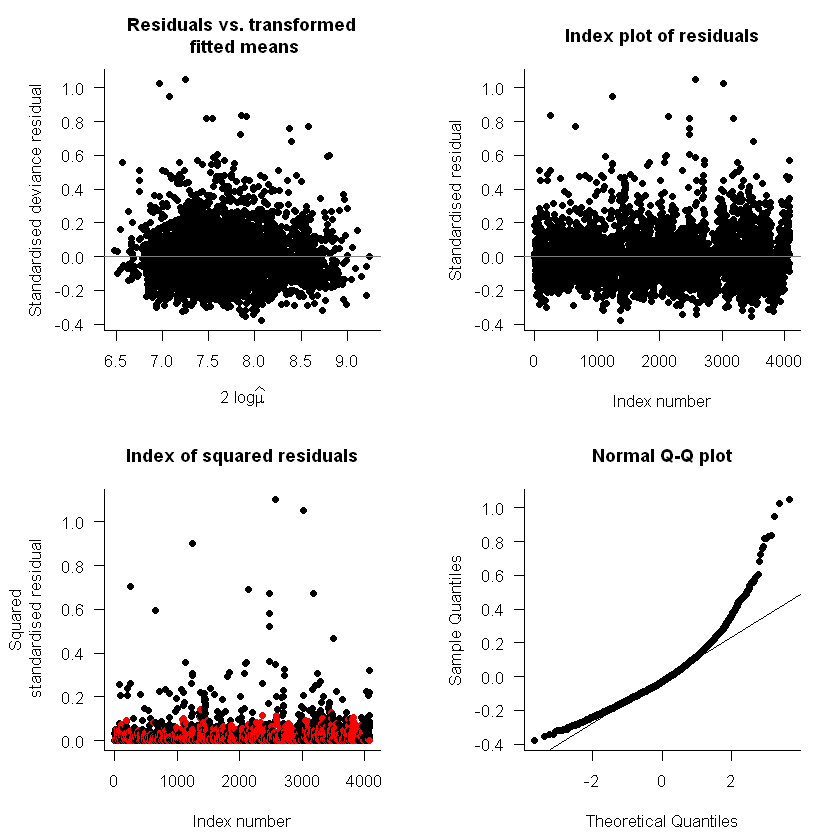

In [108]:
# Diagnostic plots for glms
par(mfrow = c(2,2))
glmResidPlot(finalGLM)

In the plot of the standardised deviance residuals against a transformation of the response mean does not include the smoothed red line. This makes it difficult to see whether the linearity assumption is reasonable. However the deviance residuals seem fairly randomly scattered about zero, although there are a few residuals with large positive values that seem outlying from the majority. At each small region of the x-axis, it seems plausible that the average of the residuals is around zero. The larger number of negative residuals for the fitted values balances the higher magnitude of the positive residuals values. Overall, the plot does not suggest any problems with the linearity assumption.

The points seem to be randomly scattered across the index number in the plots of standardised deviance residuals against index and squared standardised deviance residuals against index. As such, the assumption of independence seems reasonable.

In the next plot there are a few points which seem to have high positive residuals the rest of them seem to be fairly well mixed up. Also, since all the responses were measured on different runners, the independence assumption also seems plausible from the context of the study. (Hint for EMA states: Some runners have taken part in the race in more than one year, but this should not have a big impact on the independence assumption)

Looking at the final data plot very few data points lie across the fitted line. The points in the plot systematically deviate quite far from the line, especially for negative and positive residuals. As such, it looks like the exponential regression model may not be suitable for modelling these data.

In [109]:
detach(dataframe4)

## Using a test data set on the models

In [196]:
# load dataframe
load("greensand21.RData")

In [198]:
str(greensand21)

'data.frame':	204 obs. of  9 variables:
 $ year    : Factor w/ 1 level "2021": 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 198 levels "1021","2011",..: 57 54 59 61 25 90 74 112 120 78 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ age     : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.54 4.05 9.1 5.84 5.28 4.68 5.54 4.05 9.1 5.84 ...
 $ legTime : num  59.4 33.1 71.3 44.5 43.1 ...
 $ mpm     : num  10.73 8.17 7.84 7.63 8.16 ...


In [216]:
# Make the vectors (variables) in the data frame directly accessible to R
attach(greensand21)

# Check the dataframe has loaded OK
head(greensand21)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
2019,27262,F,55,58.0,1,5.54,59.42,10.73
2019,27228,F,45,48.0,2,4.05,33.08,8.17
2019,28014,F,65,65.5,3,9.10,71.32,7.84
2019,28100,F,35,32.5,4,5.84,44.55,7.63
2019,24046,F,45,53.0,5,5.28,43.08,8.16
2019,30227,F,45,51.5,6,4.68,35.83,7.66


In [217]:
# code to check if missing values for any variables
cat("Missing values by variable")
colSums(is.na(greensand21))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0        0        0        0        0 
     mpm 
       0

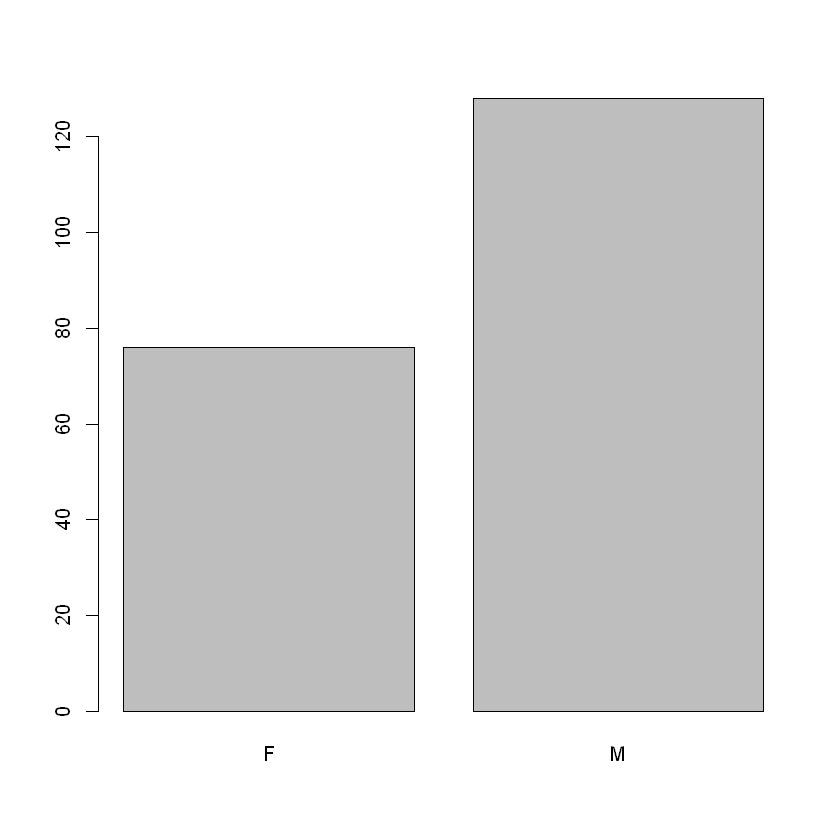

In [218]:
# sense check male:female ratio
plot(gender)

In [219]:
detach(greensand21)

In [220]:
# change year to 2019 in new dataframe
greensand21$year  <- "2019"

In [213]:
# check change
str(greensand21)

'data.frame':	204 obs. of  9 variables:
 $ year    : chr  "2019" "2019" "2019" "2019" ...
 $ id      : Factor w/ 198 levels "1021","2011",..: 57 54 59 61 25 90 74 112 120 78 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ age     : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.54 4.05 9.1 5.84 5.28 4.68 5.54 4.05 9.1 5.84 ...
 $ legTime : num  59.4 33.1 71.3 44.5 43.1 ...
 $ mpm     : num  10.73 8.17 7.84 7.63 8.16 ...


In [221]:
# change year to 2019 in new dataframe to factor
greensand21$year  <- as.factor(greensand21$year)

In [222]:
str(greensand21)

'data.frame':	204 obs. of  9 variables:
 $ year    : Factor w/ 1 level "2019": 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 198 levels "1021","2011",..: 57 54 59 61 25 90 74 112 120 78 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ age     : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.54 4.05 9.1 5.84 5.28 4.68 5.54 4.05 9.1 5.84 ...
 $ legTime : num  59.4 33.1 71.3 44.5 43.1 ...
 $ mpm     : num  10.73 8.17 7.84 7.63 8.16 ...


In [223]:
# re-attach dataframe
attach(greensand21)
head(greensand21)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
2019,27262,F,55,58.0,1,5.54,59.42,10.73
2019,27228,F,45,48.0,2,4.05,33.08,8.17
2019,28014,F,65,65.5,3,9.10,71.32,7.84
2019,28100,F,35,32.5,4,5.84,44.55,7.63
2019,24046,F,45,53.0,5,5.28,43.08,8.16
2019,30227,F,45,51.5,6,4.68,35.83,7.66


In [224]:
#create new dataframe for predictions for models with age
dataframe8  <- data.frame(age,leg,gender,year)

head(dataframe8)
str(dataframe8)

age,leg,gender,year
58.0,1,F,2019
48.0,2,F,2019
65.5,3,F,2019
32.5,4,F,2019
53.0,5,F,2019
51.5,6,F,2019


'data.frame':	204 obs. of  4 variables:
 $ age   : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg   : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ gender: Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ year  : Factor w/ 1 level "2019": 1 1 1 1 1 1 1 1 1 1 ...


In [225]:
#attach new dataframe
detach(greensand21)
attach(dataframe8)

In [226]:
# add predictions to dataframe
dataframe8$PredictionsMLR1A  <- predict(finalMLR, newdata = dataframe8)
dataframe8$PredictionsGLM1A  <- predict(finalGLM,newdata = dataframe8, type = "response")

head(dataframe8)

age,leg,gender,year,PredictionsMLR1A,PredictionsGLM1A
58.0,1,F,2019,4.016682,56.04079
48.0,2,F,2019,3.658375,39.14798
65.5,3,F,2019,4.496544,89.99238
32.5,4,F,2019,3.957552,53.08190
53.0,5,F,2019,4.014812,56.14118
51.5,6,F,2019,3.772857,44.16105


In [227]:
#re-attach dataframe with new values
detach(dataframe8)
attach(dataframe8)

In [231]:
# convert MLR predictions 
dataframe8$PredMLR1A  <- exp(PredictionsMLR1A)
head(dataframe8)

age,leg,gender,year,PredictionsMLR1A,PredictionsGLM1A,PredMLR1,PredMLR1A
58.0,1,F,2019,4.016682,56.04079,55.51661,55.51661
48.0,2,F,2019,3.658375,39.14798,38.79823,38.79823
65.5,3,F,2019,4.496544,89.99238,89.70661,89.70661
32.5,4,F,2019,3.957552,53.08190,52.32909,52.32909
53.0,5,F,2019,4.014812,56.14118,55.41290,55.41290
51.5,6,F,2019,3.772857,44.16105,43.50419,43.50419


In [232]:
#re-attach dataframe with new values
detach(dataframe8)
attach(dataframe8)

head(dataframe8)

age,leg,gender,year,PredictionsMLR1A,PredictionsGLM1A,PredMLR1,PredMLR1A
58.0,1,F,2019,4.016682,56.04079,55.51661,55.51661
48.0,2,F,2019,3.658375,39.14798,38.79823,38.79823
65.5,3,F,2019,4.496544,89.99238,89.70661,89.70661
32.5,4,F,2019,3.957552,53.08190,52.32909,52.32909
53.0,5,F,2019,4.014812,56.14118,55.41290,55.41290
51.5,6,F,2019,3.772857,44.16105,43.50419,43.50419


In [233]:
predMLR1A <- dataframe8[,'PredMLR1A']
predGLM1A <- dataframe8[,'PredictionsGLM1A']
obsAgeA <- greensand21[,'legTime']

# code to run MSE for MLR1
mean((predMLR1A - obsAgeA)^2)
# code to run MAPE
mean(abs((predMLR1A - obsAgeA)/obsAgeA))

# code to run MSE for GLM1
mean((predGLM1A - obsAgeA)^2)
# code to run MAPE
mean(abs((predGLM1A - obsAgeA)/obsAgeA))

[1] 63.71908

[1] 0.1204544

[1] 62.74925

[1] 0.1221795

In [234]:
detach(dataframe8)
attach(greensand21)

In [235]:
#create new dataframe for predictions for models with age class
dataframe9  <- data.frame(leg,ageClass,gender,year)

head(dataframe9)
str(dataframe9)

leg,ageClass,gender,year
1,55,F,2019
2,45,F,2019
3,65,F,2019
4,35,F,2019
5,45,F,2019
6,45,F,2019


'data.frame':	204 obs. of  4 variables:
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ year    : Factor w/ 1 level "2019": 1 1 1 1 1 1 1 1 1 1 ...


In [236]:
#attach new dataframe
detach(greensand21)
attach(dataframe9)

In [237]:
# add predictions to dataframe
dataframe9$PredictionsMLR2A  <- predict(finalMLR2, newdata = dataframe9)
dataframe9$PredictionsGLM2A  <- predict(finalGLM2, newdata = dataframe9, type = "response")

head(dataframe9)

leg,ageClass,gender,year,PredictionsMLR2A,PredictionsGLM2A
1,55,F,2019,4.029378,56.97222
2,45,F,2019,3.661484,39.32445
3,65,F,2019,4.547810,94.64339
4,35,F,2019,3.977937,53.91450
5,45,F,2019,3.992869,55.00857
6,45,F,2019,3.761237,43.69307


In [238]:
#re-attach dataframe with new values
detach(dataframe9)
attach(dataframe9)

In [239]:
# convert MLR predictions 
dataframe9$PredMLR2A  <- exp(PredictionsMLR2A)
head(dataframe9)

leg,ageClass,gender,year,PredictionsMLR2A,PredictionsGLM2A,PredMLR2A
1,55,F,2019,4.029378,56.97222,56.22594
2,45,F,2019,3.661484,39.32445,38.91907
3,65,F,2019,4.547810,94.64339,94.42535
4,35,F,2019,3.977937,53.91450,53.40675
5,45,F,2019,3.992869,55.00857,54.21018
6,45,F,2019,3.761237,43.69307,43.00158


In [240]:
#re-attach dataframe with new values
detach(dataframe9)
attach(dataframe9)

head(dataframe9)

leg,ageClass,gender,year,PredictionsMLR2A,PredictionsGLM2A,PredMLR2A
1,55,F,2019,4.029378,56.97222,56.22594
2,45,F,2019,3.661484,39.32445,38.91907
3,65,F,2019,4.547810,94.64339,94.42535
4,35,F,2019,3.977937,53.91450,53.40675
5,45,F,2019,3.992869,55.00857,54.21018
6,45,F,2019,3.761237,43.69307,43.00158


In [241]:
predMLR2A <- dataframe9[,'PredMLR2A']
predGLM2A <- dataframe9[,'PredictionsGLM2A']
obsAgeA <- greensand21[,'legTime']

# code to run MSE for MLR2
mean((predMLR2A - obsAgeA)^2)
# code to run MAPE
mean(abs((predMLR2A - obsAgeA)/obsAgeA))

# code to run MSE for GLM2
mean((predGLM2A - obsAgeA)^2)
# code to run MAPE
mean(abs((predGLM2A - obsAgeA)/obsAgeA))

[1] 66.3436

[1] 0.1235378

[1] 65.75865

[1] 0.1250976

In [242]:
detach(dataframe9)

|Model            |MSE     |MAPE    |
|-----------------|--------|--------|
|MLR with age     |63.719  |0.120   |
|MLR with ageClass|66.344  |0.124   |
|GLM with age     |62.749  |0.122   |
|GLM with ageClass|65.759  |0.125   |

The table above shows the respective MSE's and MAPE's of all four models using the test dataset.

The model which has the lowest MSE is the GLM using `age` as a variable so according to MSE this is the best model.

The model which has the lowest MAPE is the MLR model using `age` as a variable so according to MAPE this is the best model.

## Recommending which model to use to make predictions

The MSE and MAPE values for the models used in part d) ii) were based upon the training dataset which is why these values were lower. You would expect a model to perform better on data that is used to build it. 

However to test if a model works it is best to try it on a test data set such as we did in part d) iii). The MSE and MAPE values will go up but this is to be expected. 

Both the GLM and MLR models using `age` as a variable give a MAPE of 12% meaning the predictions are on average 12% away from the actual values they were aiming for. However the MSE for the GLM is lower than the MLR model.

Therefore the model I would recommend would be the GLM model using `age` as a variable.

The model is 

`legTime` ~ `age` + `leg` + `gender` + `year` + `leg:year` + `age:year` + `age:gender`